In [196]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

sns.set_context("talk")

In [171]:
election_data= pd.read_csv("Datasets\General Election Data.csv")
election_data.drop("Unnamed: 0", inplace=True, axis=1)
election_data=election_data[election_data.Year.isin([1971, 1977, 1980])]
election_data.head()

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,...,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name
0,GE,Andaman & Nicobar Islands,5,1,1971,3.0,0,2,1,K .R. GANESH,...,3482.0,ANDAMAN NICOBAR,False,True,2,False,True,True,NaN,NaN
1,GE,Andaman & Nicobar Islands,5,1,1971,3.0,0,2,2,P. K. S. PRASAD,...,NaN,NaN,NaN,NaN,0,False,False,False,NaN,NaN
2,GE,Andaman & Nicobar Islands,5,1,1971,3.0,0,2,3,RAMESH CHANDRA MUZUMDAR,...,NaN,NaN,NaN,NaN,0,False,False,False,NaN,NaN
3,GE,Andaman & Nicobar Islands,5,1,1971,3.0,0,2,4,PABITRA KUMAR BISWAS,...,NaN,NaN,NaN,NaN,0,False,False,False,NaN,NaN
4,GE,Andaman & Nicobar Islands,5,1,1971,3.0,0,2,5,SAMAR SOM,...,NaN,NaN,NaN,NaN,0,False,False,False,NaN,NaN


### Election Results
    As we all know the 1977 is a heavy blow for the Indian National Congress. Both incumbent Prime Minister Indira Gandhi and her son Sanjay Gandhi lost their seat. The waffle chart below captures the performance of all other major parties. 

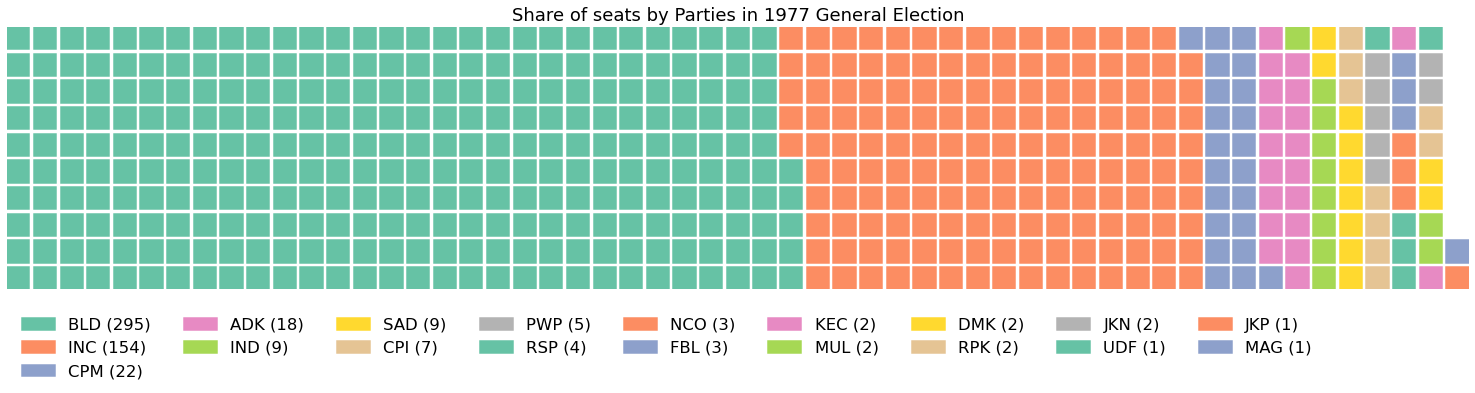

In [222]:
election_1977 = election_data[election_data["Year"]==1977]
winners_1977= election_1977[election_1977["Position"]==1]


data = winners_1977.Party.value_counts()
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data,  
    title={'label': 'Share of seats by Parties in 1977 General Election', 'loc': 'center'},
    labels=["{0} ({1})".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 9, 'framealpha': 0},
    figsize=(22,10),
    cmap_name="Set2",
    tight=True
)

fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#FFFFFF')

plt.show()

### Overall Voter Turnout
    General Election of 1977 saw an significant raise in overall voter turnout. The below chart compares this metric with the General Election of 1971 and 1977. 

Text(0, 0.5, 'Voter Turnout')

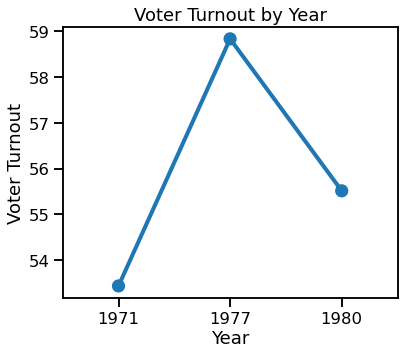

In [220]:
total_electors=election_data.groupby(by=[ "Year", 'Constituency_Name' ])["Electors"].agg(np.mean).groupby(by="Year").agg(np.sum)
total_votes= election_data.groupby(by=[ "Year", 'Constituency_Name'])[ 'Valid_Votes'].agg(np.mean).groupby(by="Year").agg(np.sum)

voter_turnout=(total_votes/total_electors )*100

fig=plt.figure(figsize=(6,5))

sns.pointplot(y=voter_turnout.values, x=voter_turnout.index)
plt.title("Voter Turnout by Year")
plt.ylabel("Voter Turnout")

In [138]:
election_data.columns

Index(['Election_Type', 'State_Name', 'Assembly_No', 'Constituency_No', 'Year',
       'month', 'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party',
       'Votes', 'Candidate_Type', 'Valid_Votes', 'Electors',
       'Constituency_Name', 'Constituency_Type', 'Sub_Region', 'N_Cand',
       'Turnout_Percentage', 'Vote_Share_Percentage', 'Deposit_Lost', 'Margin',
       'Margin_Percentage', 'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID',
       'last_poll', 'Contested', 'Last_Party', 'Last_Party_ID',
       'Last_Constituency_Name', 'Same_Constituency', 'Same_Party', 'No_Terms',
       'Turncoat', 'Incumbent', 'Recontest', 'Age', 'District_Name'],
      dtype='object')